<a href="https://colab.research.google.com/github/smaran19/Unsupervised-ML---Online-Retail-Customer-Segmentation/blob/main/customer_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel( '/content/drive/MyDrive/Colab Notebooks/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## General Insights

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Check unit price and quantity distribution, it seems quite odd!!

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

## Data cleaning

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Function to print percentage of missing values per column
def mis_val(d):
    l=[]
    for x in d.isnull().sum().index:
        g=[]
        g.append(x)
        g.append(d[x].isnull().sum())
        per=(d[x].isnull().sum()/len(d))*100
        g.append(per)
        l.append(g)
    misd=pd.DataFrame(l)
    misd.columns=['Column','Missing Value','Percentage of Missing Value']
    misd.sort_values(by='Percentage of Missing Value',ascending=False,inplace=True)
    return misd

In [ ]:
mis_val(df)

,Column,Missing Value,Percentage of Missing Value
6,CustomerID,135080,24.926694
2,Description,1454,0.268311
0,InvoiceNo,0,0.000000
1,StockCode,0,0.000000
3,Quantity,0,0.000000
4,InvoiceDate,0,0.000000
5,UnitPrice,0,0.000000
7,Country,0,0.000000


It is impossible to impute these many missing values in customer without significant alteration of information.
We will have to drop these entries.

In [ ]:
df1=df.copy()

In [ ]:
df1.dropna(subset=['CustomerID'],axis=0,inplace=True)

In [ ]:
mis_val(df1)

,Column,Missing Value,Percentage of Missing Value
0,InvoiceNo,0,0.0
1,StockCode,0,0.0
2,Description,0,0.0
3,Quantity,0,0.0
4,InvoiceDate,0,0.0
5,UnitPrice,0,0.0
6,CustomerID,0,0.0
7,Country,0,0.0


It seems that null removal has occured for description column as well.

In [ ]:
### Checking for Duplicates
df1.duplicated().sum()

5225

In [ ]:
df1[df1.duplicated()==True].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom


In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.duplicated().sum()

0

## 2. Exploring the Data

### Countries

In [ ]:
df1.Country.value_counts()

Country
United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45


In [ ]:
#Plotting our top 10 countries as percentage of total order
plt_countries=df1.Country.value_counts()[0:10]/len(df1)*100
plt_countries=pd.DataFrame(plt_countries)
plt_countries.columns=['Percent of total orders']
plt_countries

,Percent of total orders
Country,
United Kingdom,88.825809
Germany,2.360534
France,2.110288
EIRE,1.861286
Spain,0.629476
Netherlands,0.590383
Belgium,0.515184
Switzerland,0.467376
Portugal,0.366281


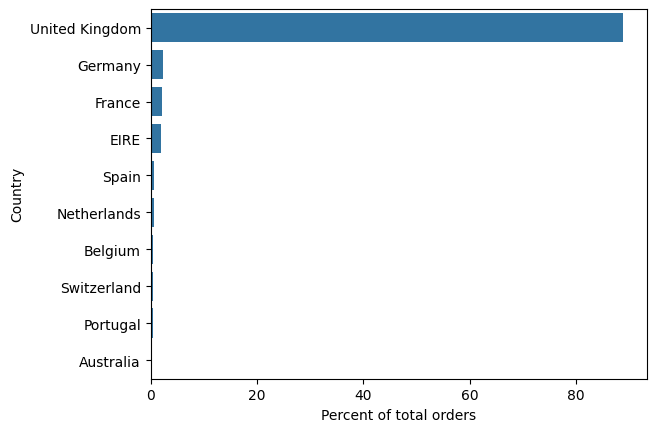

In [ ]:
sns.barplot(data=plt_countries,y=plt_countries.index,x=plt_countries['Percent of total orders']);


It seems most of our orders(~90%) is in United Kingdom.

## Cohort Analysis

In [ ]:
df3=df1.copy()
df3.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [ ]:
df3.reset_index(inplace=True)
df3.drop('index',axis='columns',inplace=True)
df3.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
import datetime as dt

In [ ]:
df3['InvoiceDate'][0].month

12

In [ ]:
df3['InvoiceDate'][0].year

2010

In [ ]:
x=dt.date(2010,12,12)
print(x)

2010-12-12


In [ ]:
# This function takes datetime as input and returns year/month/1
def for_start(y):
    y1=y.month
    y2=y.year
    y3=dt.date(y2,y1,1)
    return y3

In [ ]:
df3['InvoiceFormat']=df3['InvoiceDate'].apply(for_start)
df3.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01


In [ ]:
# First Transaction month (Cohort Month) for each customer
df3['Cohort Month']=df3.groupby('CustomerID')['InvoiceFormat'].transform(min)
df3.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat,Cohort Month
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [ ]:
# This function calculates difference between invoice format and cohort month
def diff(d,x1,y1):
    l=[]
    for i in range(0,len(d)):
        xyear=d[x1][i].year
        xmonth=d[x1][i].month
        yyear=d[y1][i].year
        ymonth=d[y1][i].month
        diff=((xyear-yyear)*12)+(xmonth-ymonth)+1
        l.append(diff)
    return l

In [ ]:
df3['Cohort Index']=diff(df3,'InvoiceFormat','Cohort Month')

In [ ]:
df3.tail(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceFormat,Cohort Month,Cohort Index
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [ ]:
df4=df3[['CustomerID','Cohort Month','Cohort Index']]
df4.head(3)

,CustomerID,Cohort Month,Cohort Index
0,17850.0,2010-12-01,1
1,17850.0,2010-12-01,1
2,17850.0,2010-12-01,1


In [ ]:
df5=df4.groupby(['Cohort Month','Cohort Index'])['CustomerID'].apply(pd.Series.nunique).reset_index()
df5.head()

,Cohort Month,Cohort Index,CustomerID
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341


In [ ]:
pivot_table = df5.pivot(index='Cohort Month', columns=['Cohort Index'],values='CustomerID')
pivot_table

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


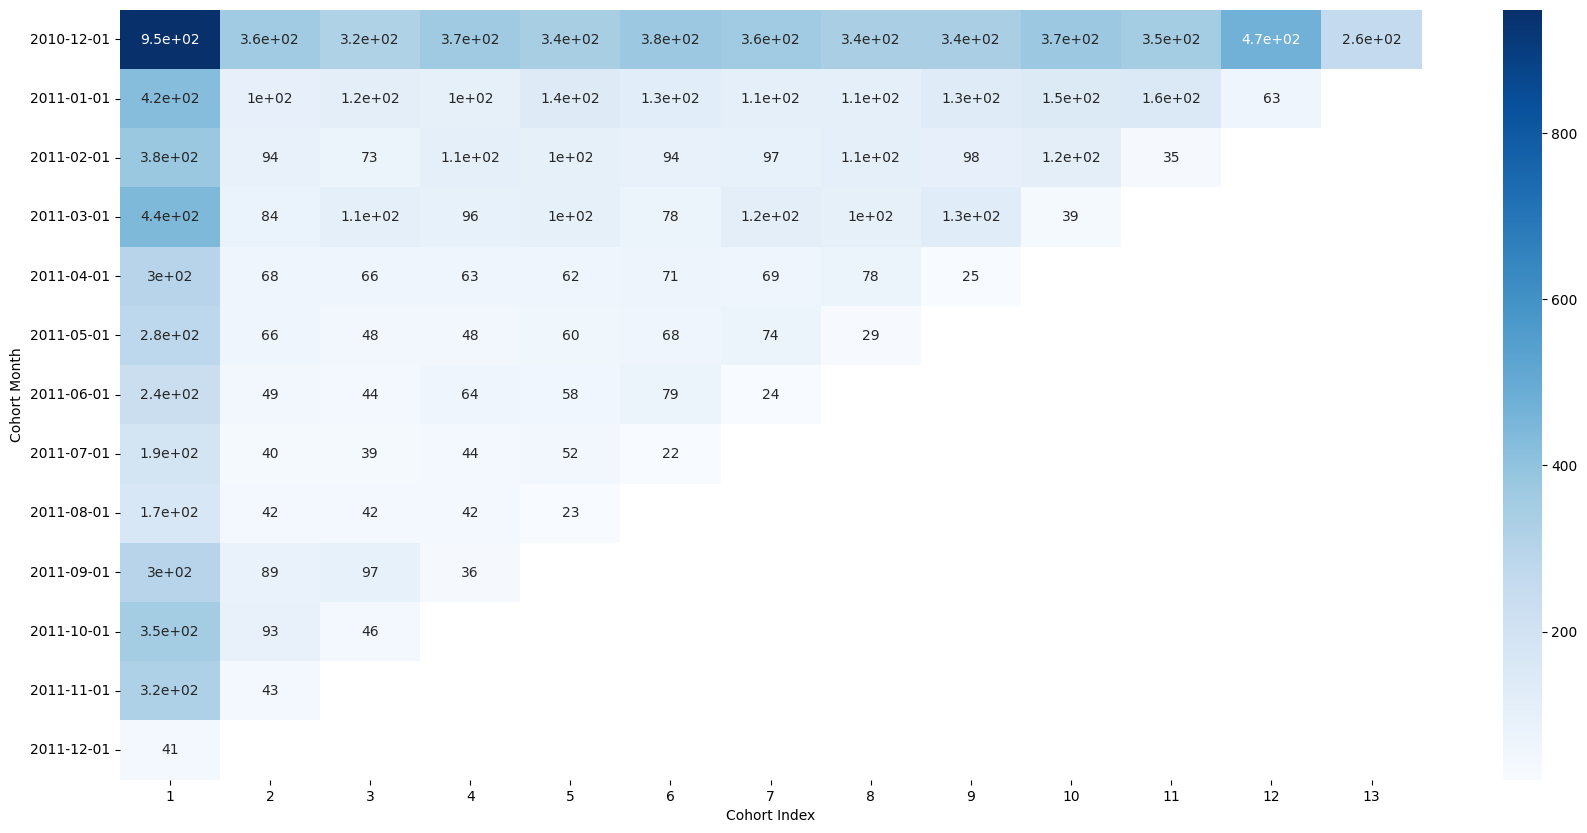

In [ ]:
plt.figure(figsize=(21,10))
sns.heatmap(pivot_table,annot=True,cmap='Blues');

In [ ]:
#cohort table for percentage
new_cohort_table = pivot_table.divide(pivot_table.iloc[:,0],axis=0)
new_cohort_table

Cohort Index,1,2,3,4,5,6,7,8,9,10,11,12,13
Cohort Month,,,,,,,,,,,,,
2010-12-01,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02-01,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03-01,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04-01,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


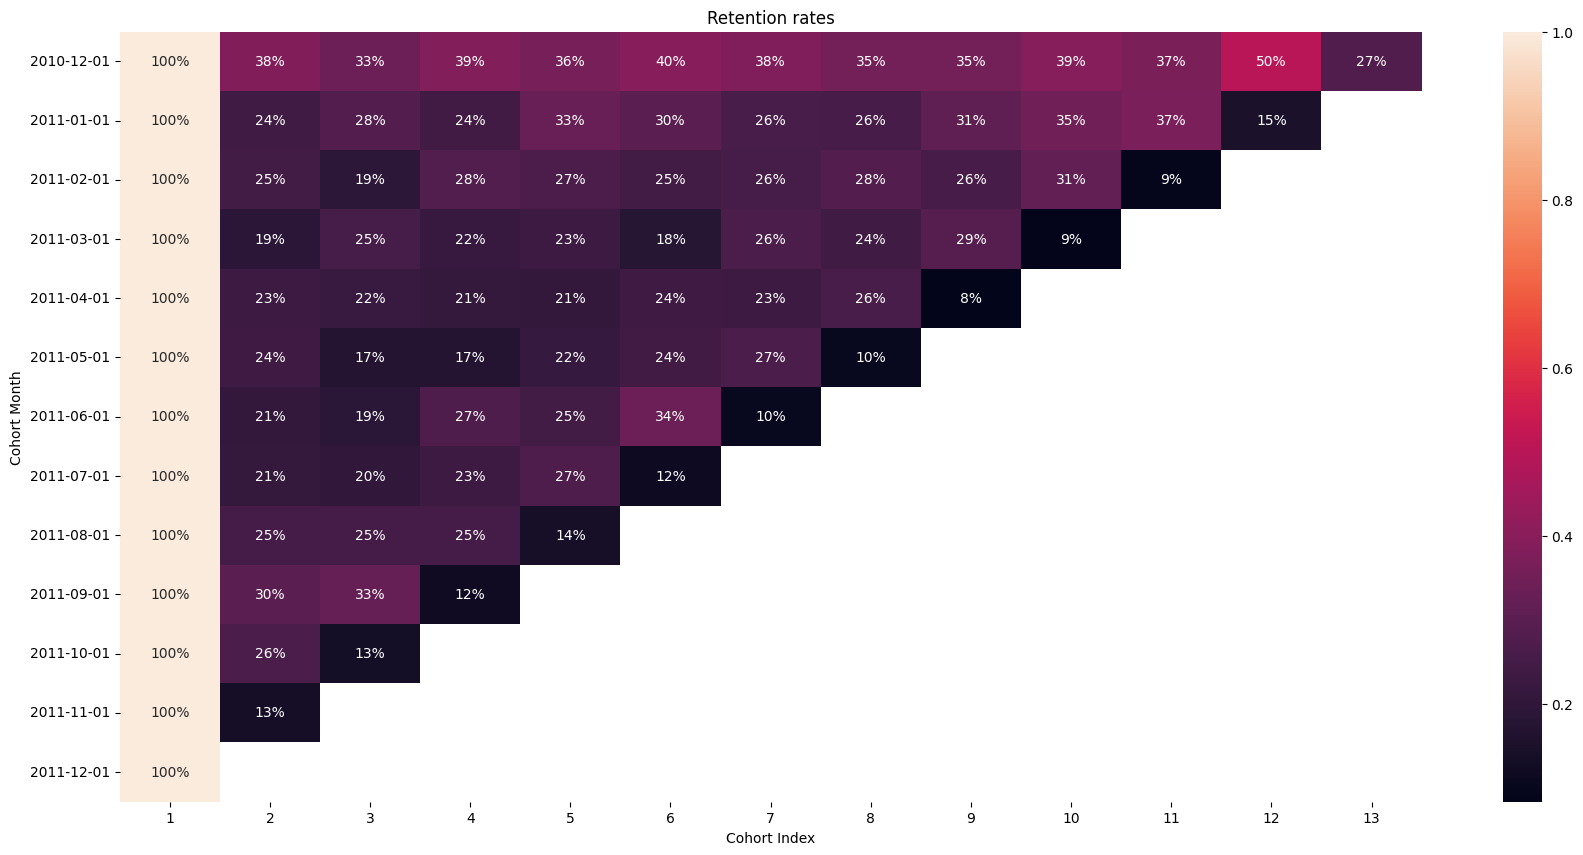

In [ ]:
plt.figure(figsize=(21,10))
sns.heatmap(new_cohort_table,annot=True,fmt='.0%')
plt.title('Retention rates');

# Summary statement:

1. We are roughly left with 10% of new joiners after an year of use. Retention thereby is quite poor.

2. Every month we are adding roughly 250 new people. Marketing regarding this aspect is Ok.

## RFM Analysis

In [ ]:
df6=df1.copy()
df6=df6[( df6.UnitPrice*df6.Quantity)>0]
df6.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Recency

In [ ]:
# Start and end dates:
print('Start date: {}'.format(df6.InvoiceDate.min()))
print('End date: {}'.format(df6.InvoiceDate.max()))

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


We will take snapshot date as the start of new year 2012-01-01

In [ ]:
day="2012-01-01"
day=pd.to_datetime(day)

In [ ]:
recency=df6.groupby(["CustomerID"]).agg({"InvoiceDate":lambda x:((day-x.max()).days)})
recency.head(10)

,InvoiceDate
CustomerID,
12346.0,347
12347.0,24
12348.0,97
12349.0,40
12350.0,332
12352.0,58
12353.0,226
12354.0,254
12355.0,236


### Frequency

In [ ]:
df6.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
type(df6.groupby(['CustomerID'])[['InvoiceNo']].count())

pandas.core.frame.DataFrame

In [ ]:
df6.groupby('CustomerID')[['InvoiceNo']].count().head(5)

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


In [ ]:
freq=df6.groupby(["CustomerID"])[["InvoiceNo"]].count()
freq.head(5)

,InvoiceNo
CustomerID,
12346.0,1
12347.0,182
12348.0,31
12349.0,73
12350.0,17


### Monetary

In [ ]:
df6["total"]=df6["Quantity"]*df6["UnitPrice"]
money=df6.groupby(["CustomerID"])[["total"]].sum()
money

,total
CustomerID,
12346.0,77183.60
12347.0,4310.00
12348.0,1797.24
12349.0,1757.55
12350.0,334.40
...,...
18280.0,180.60
18281.0,80.82
18282.0,178.05


In [ ]:
recency.columns=["Recency"]
freq.columns=["Frequency"]
money.columns=["Monetary"]

In [ ]:
RFM=pd.concat([recency,freq,money], axis=1)
RFM

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,182,4310.00
12348.0,97,31,1797.24
12349.0,40,73,1757.55
12350.0,332,17,334.40
...,...,...,...
18280.0,299,10,180.60
18281.0,202,7,80.82
18282.0,29,12,178.05


In [ ]:
RFM.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,114.059474,90.523744,2048.688081
std,100.012264,225.506968,8985.230220
min,22.000000,1.000000,3.750000
25%,39.000000,17.000000,306.482500
50%,72.000000,41.000000,668.570000
75%,163.750000,98.000000,1660.597500
max,395.000000,7676.000000,280206.020000


## Clustering

### Checking Skewness

<ipython-input-51-09421bde6f6b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'],bins=50)
<ipython-input-51-09421bde6f6b>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'],bins=100)
<ipython-input-51-09421bde6f6b>:11: Use

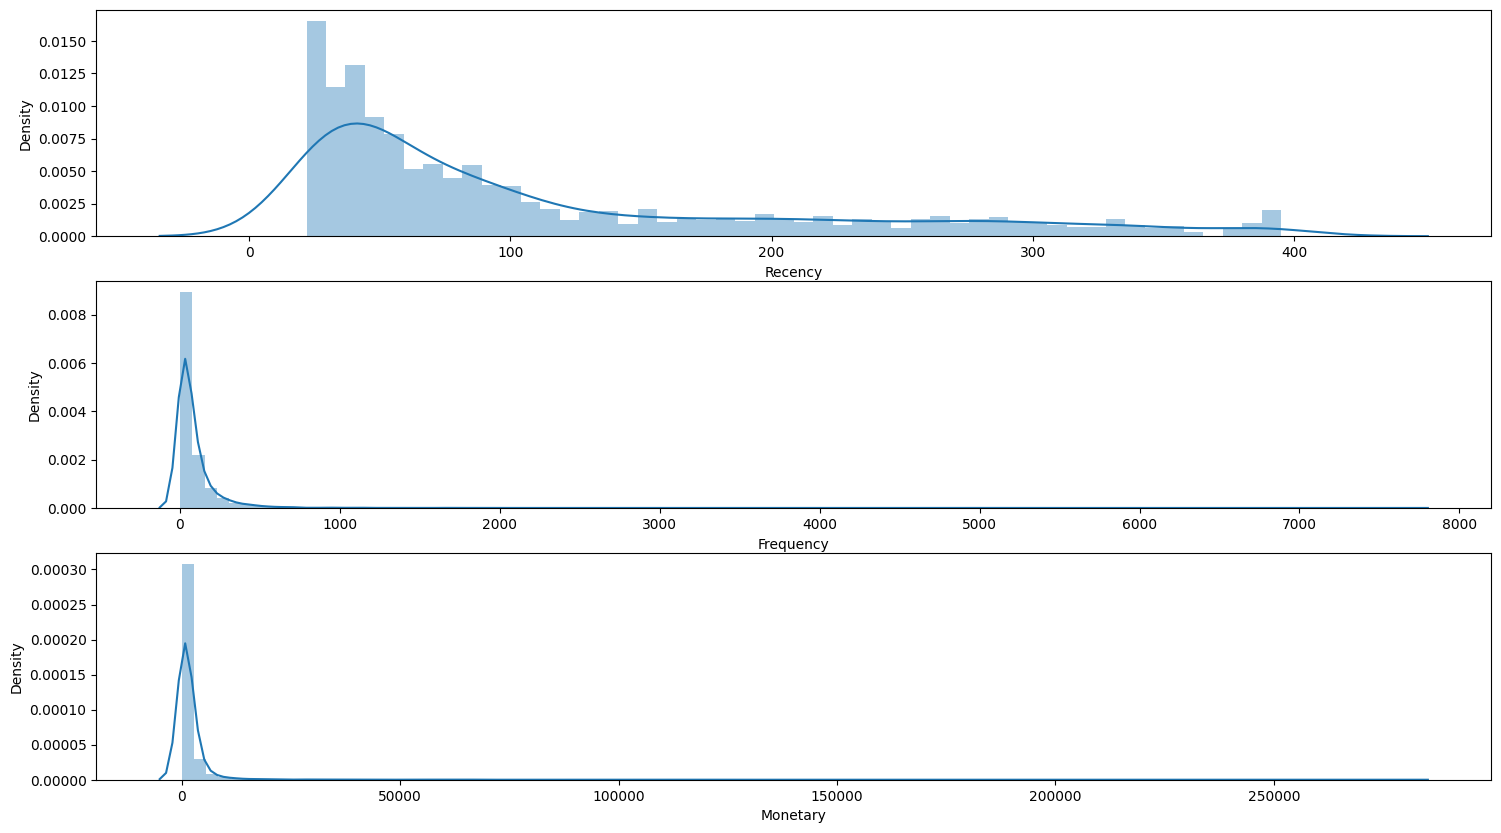

In [ ]:
# Checking the distribution of Recency, Frequency and MonetaryValue variables.
plt.figure(figsize=(18,10))

# Plot distribution of var1
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'],bins=50)

# Plot distribution of var2
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'],bins=100)

# Plot distribution of var3
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'],bins=100)

plt.show()

Data seems to be left skewed. Log transformation can be helpful

In [ ]:
from sklearn.preprocessing import StandardScaler
# Unskew the data
data_log = np.log(RFM)

# Initialize a standard scaler and fit it
scaler = StandardScaler()
scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.transform(data_log)
scaled=data_normalized

# Create a pandas DataFrame
data_norm = pd.DataFrame(data=data_normalized, index=RFM.index, columns=RFM.columns)

<ipython-input-53-f95b4b8c41f3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])
<ipython-input-53-f95b4b8c41f3>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])
<ipython-input-53-f95b4b8c41f3>:10: UserWarn

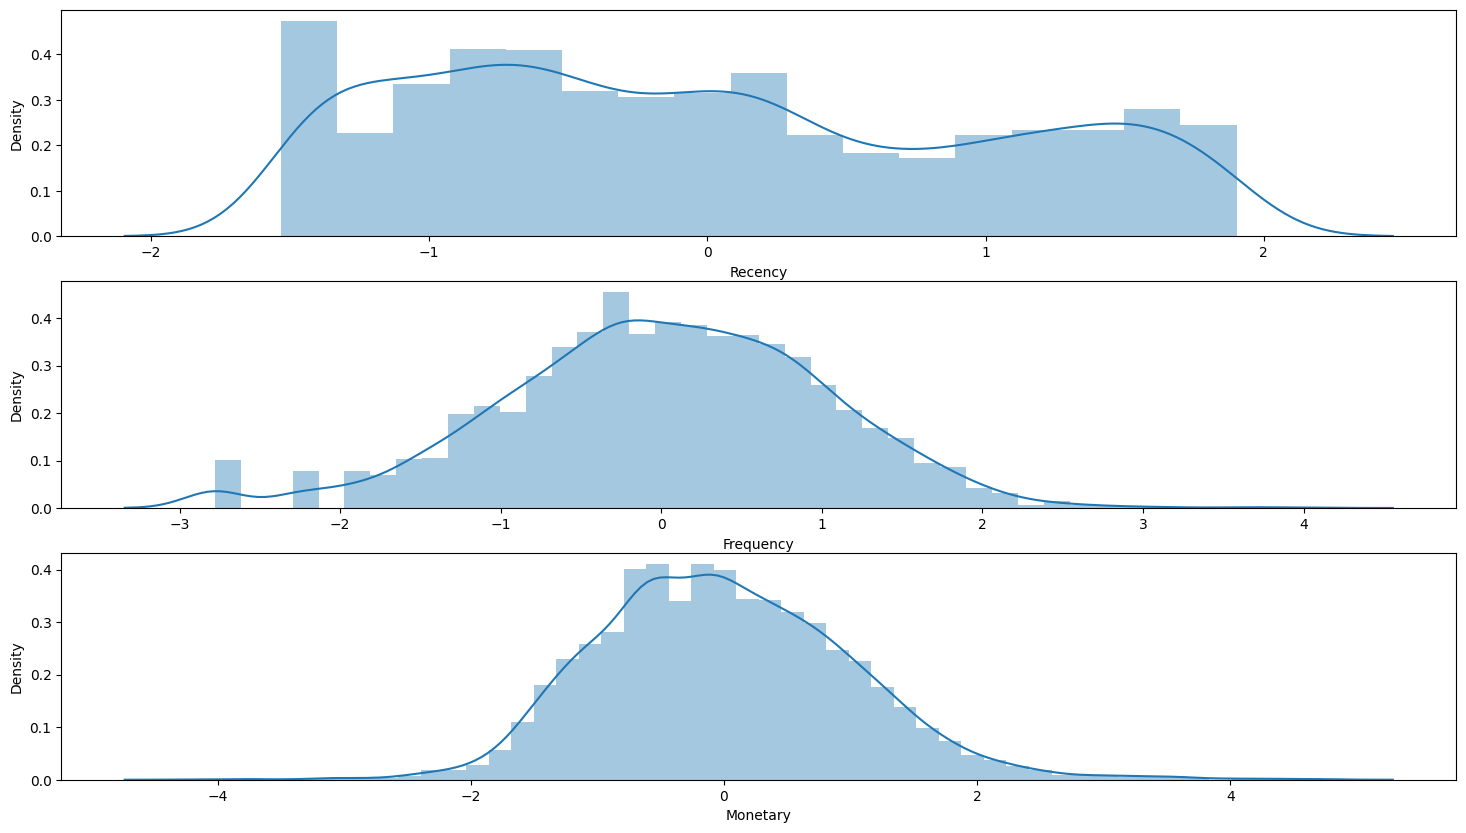

In [ ]:
plt.figure(figsize=(18,10))

# Plot recency distribution
plt.subplot(3, 1, 1); sns.distplot(data_norm['Recency'])

# Plot frequency distribution
plt.subplot(3, 1, 2); sns.distplot(data_norm['Frequency'])

# Plot monetary value distribution
plt.subplot(3, 1, 3); sns.distplot(data_norm['Monetary'])

# Show the plot
plt.show()

Skewness has been removed

# Implementing K means

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
inertia=[]

for i in np.arange(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    cluster_labels = kmeans.fit_predict(scaled)
    silhouette_avg = silhouette_score(scaled, cluster_labels,random_state=22)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3958706643442868


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.319051064244218


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.32338057371231327


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.29805830872167155


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2943349843802484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.2773689373740853


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2632936982012907


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.2577144186182331


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.26249196480994047


In [ ]:
inertia=[]

for i in np.arange(2,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.3958706643442868


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.3216602322832824


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3238697714199376


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.2973929877123153


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.2940912506626164


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.2748781595160926


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.2648530496226388


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.2581462334181204


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.2527691916321084


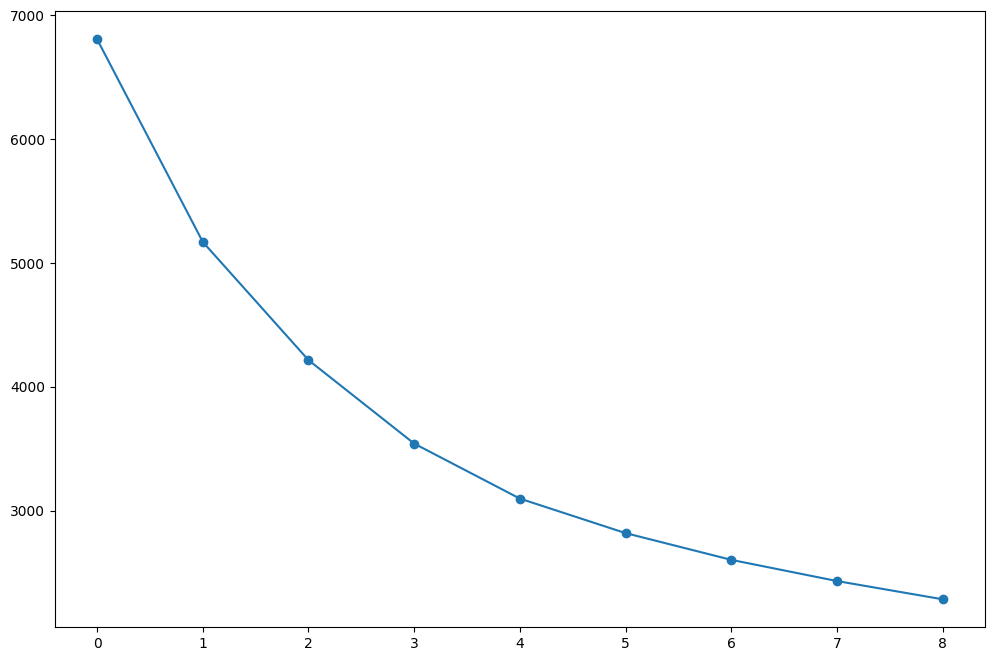

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(inertia, marker="o");

Elbow seems to be at n=3

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=22)
kmeans.fit(scaled)
RFM["Clusters"]=(kmeans.labels_+1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.labels_+1

array([2, 1, 3, ..., 3, 1, 1], dtype=int32)

In [ ]:
cluster_labels=kmeans.labels_+1

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
rf=RFM.drop('Clusters',axis='columns')

In [ ]:
rf

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,347,1,77183.60
12347.0,24,182,4310.00
12348.0,97,31,1797.24
12349.0,40,73,1757.55
12350.0,332,17,334.40
...,...,...,...
18280.0,299,10,180.60
18281.0,202,7,80.82
18282.0,29,12,178.05


In [ ]:
silhouette_avg = silhouette_score(rf, cluster_labels)
silhouette_avg

-0.009393508145326366

In [ ]:
RFM

,Recency,Frequency,Monetary,Clusters
CustomerID,,,,
12346.0,347,1,77183.60,2
12347.0,24,182,4310.00,1
12348.0,97,31,1797.24,3
12349.0,40,73,1757.55,1
12350.0,332,17,334.40,2
...,...,...,...,...
18280.0,299,10,180.60,2
18281.0,202,7,80.82,2
18282.0,29,12,178.05,3


In [ ]:
def func(row):
    if row["Clusters"]==1:
        return 'Major Customers'
    elif row["Clusters"]==2:
        return 'At Risk'
    else:
        return 'Average Standing Customers'

In [ ]:
RFM['group']=RFM.apply(func, axis=1)
RFM

,Recency,Frequency,Monetary,Clusters,group
CustomerID,,,,,
12346.0,347,1,77183.60,2,At Risk
12347.0,24,182,4310.00,1,Major Customers
12348.0,97,31,1797.24,3,Average Standing Customers
12349.0,40,73,1757.55,1,Major Customers
12350.0,332,17,334.40,2,At Risk
...,...,...,...,...,...
18280.0,299,10,180.60,2,At Risk
18281.0,202,7,80.82,2,At Risk
18282.0,29,12,178.05,3,Average Standing Customers


In [ ]:
result=RFM.group.value_counts()
result

group
Average Standing Customers    1757
Major Customers               1300
At Risk                       1281
Name: count, dtype: int64

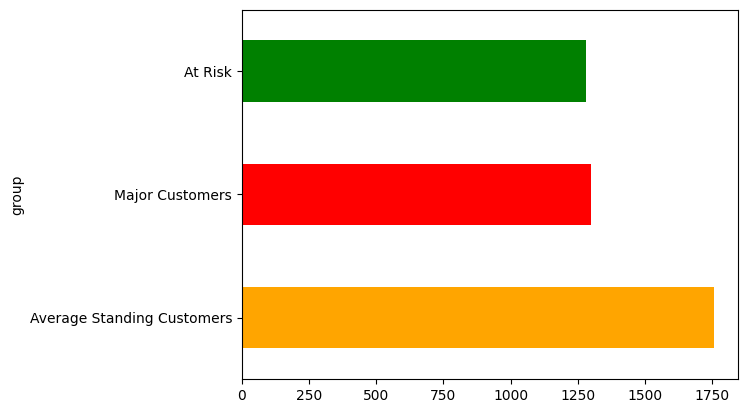

In [ ]:
result.plot(kind="barh", color=["Orange","Red","Green"]);

We see that majority of the customers are average, meaning they bring appreciable money and transact regularly

Rest of the customers are equally split between at risk(churn) category and major ones (those bringing maximum money)

In [ ]:
population_avg = RFM[['Recency','Frequency','Monetary']].mean()
population_avg

Recency       114.059474
Frequency      90.523744
Monetary     2048.688081
dtype: float64

In [ ]:
## Cluster Average

In [ ]:
cluster_average=RFM.groupby('Clusters')[['Recency','Frequency','Monetary']].mean()
cluster_average

,Recency,Frequency,Monetary
Clusters,,,
1,49.333077,225.642308,5460.900378
2,237.693208,19.027322,409.495324
3,71.811042,42.676722,719.109216


In [ ]:
relative_imp = cluster_average.divide(population_avg,axis=1)
relative_imp.round(2)

,Recency,Frequency,Monetary
Clusters,,,
1,0.43,2.49,2.67
2,2.08,0.21,0.20
3,0.63,0.47,0.35


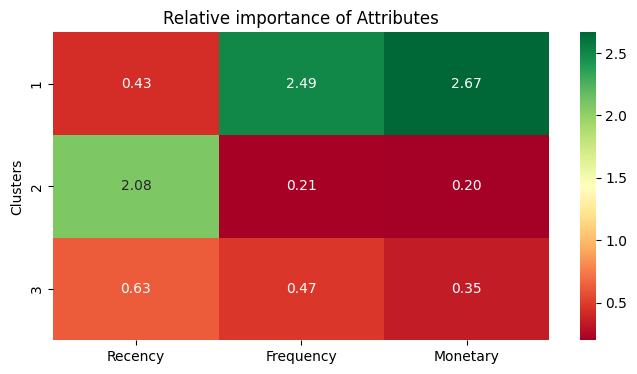

In [ ]:
# Plot heatmap
plt.figure(figsize=(8, 4))
plt.title('Relative importance of Attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

## Final Thoughts:

To understand what these 3 clusters mean in a business scenario, let us label the clusters as ‘At Risk Customers’, ‘Average Standing customers’, and ‘Best customers’.

Below is the RFM interpretation of each segment and the points that a company is recommended to keep in mind while designing the marketing strategy for that segment of customers:

1.  **<span style="color: red;">At Risk Customers</span>** : These Customers have transacted a long time ago and contribute least in monetary  terms.

- **<span style="color: magenta;">Suggestion</span>** : These customers may have already exited from customer base. Try to understand why they left. Some sale and discount offers might help to bring a portion back.

2. **<span style="color: Blue;">Average Standing customers</span>**: These Customers have transacted a recently and regularly, and contribute appreciably in monetary terms.

- **<span style="color: magenta;">Suggestion</span>** : Need to handle them with  care and convert them to best customers. Discount and Sale are highly desirable. Provide top customer support and services.

3. **<span style="color: Green;">Best customers</span>** : These customer transacted recently, are incredibly frequent and bring massive money to the company.

- **<span style="color: magenta;">Suggestion</span>** : These customers can be a target of newly launched product. Repeated advertising can further increase revenue. Heavy discounts are not required.